In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  #standartlaştırma için eklendi
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')

In [23]:
df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_Machinelearning\Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])

y=df["Salary"]
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')

x=pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25,random_state=42)

MODEL&TAHMİN

In [24]:
rf_model=RandomForestRegressor(random_state=42).fit(x_train,y_train)

In [25]:
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [26]:
y_pred=rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.73852779396566

MODEL TUNİNG

In [27]:
rf_model=RandomForestRegressor(random_state=42).fit(x_train,y_train)
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [30]:
rf_params={"max_depth":[5,8,10],
          "max_features": [2,5,10],        #featur bölünmelerde göz önünde bulundurulması gereken değişken sayısı
          "n_estimators":[200,500,1000,2000],   #ağaç sayısı (en ideal sayılar diye makaleler var(200,500))
          "min_samples_split":[2,10,80,100]}   

In [31]:
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 22.6min finished


In [32]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [35]:
rf_model=RandomForestRegressor(random_state=42,max_depth=8,max_features=2,min_samples_split=2,n_estimators=200)   #derinlik ve featuresde çok oynama yapmama hakkında tavsiye var
rf_tuned=rf_model.fit(x_train,y_train)
rf_tuned

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
y_pred=rf_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

348.2372919119422

In [37]:
#DEĞİŞKEN ÖNEM DÜZEYİ

In [39]:
rf_tuned.feature_importances_*100

array([5.83939544, 6.29671412, 3.5548773 , 4.16102585, 4.66774588,
       4.98722442, 7.39418621, 9.74125251, 8.68525461, 7.86496982,
       8.76583148, 8.2943961 , 9.70887995, 4.70922791, 2.05255543,
       1.85359068, 0.3831876 , 0.56203099, 0.47765369])

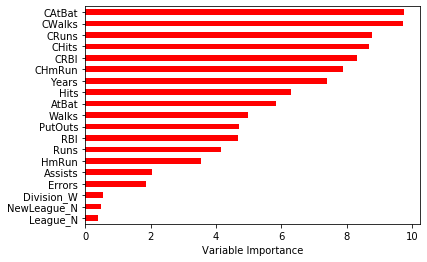

In [41]:
Importance=pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                       index=x_train.columns)
Importance.sort_values(by='Importance',
                      axis=0,
                      ascending=True).plot(kind='barh',color='r',)

plt.xlabel('Variable Importance')
plt.gca().legend_=None